In [25]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [36]:
N        = 100
density  = 0.9
f1       = 0.8
N_agents = int(N*N*density*f1) # or user input

print("For N = " + str(N) + " | N_agents = " + str(N_agents))

color_map = {-1: np.array([255, 0, 0]), # red
             0: np.array([255, 255, 255]), # green
             1: np.array([0, 0, 255])} # blue

For N = 100 | N_agents = 7200


In [37]:
# Make matrix
matrix = list()

for i in range(N):
    linha = list()
    for j in range(N):
        linha.append(0)
    matrix.append(linha)

In [38]:
offset = 1/2

def get_r (i, j, N): #i - indice linha; j - indice coluna; N - dimensão matriz
    return np.sqrt((i-(N/2 - offset))**2  +   (j-(N/2 - offset))**2)

In [39]:
r_matrix = list()

for i in range(N):
    linha_ = list()
    for j in range(N):
        linha_.append(get_r(i,j,N))
    r_matrix.append(linha_)

In [43]:
# Fill matrix

for agent in range(N_agents): # iterate on all agents to fill matrix (and make their r the lowest possible)
    
    #iterate on r_matrix
    
    r_lowest = r_matrix[0][0]
    i_lowest = 0
    j_lowest = 0
    
    for i in range(N):
        for j in range(N):
            if (r_matrix[i][j] < r_lowest) and (matrix[i][j] == 0):
                r_lowest = r_matrix[i][j]
                i_lowest = i
                j_lowest = j
    
    if matrix[i_lowest][j_lowest] == 0:
        matrix[i_lowest][j_lowest] = 1
        #print(str(agent) + ") Filled!",end='\r')
        
# Test matrix

ones = 0
zeros = 0

for i in range(N):
    for j in range(N):
        if matrix[i][j] == 0:
            zeros += 1
        if matrix[i][j] == 1:
            ones += 1
            
print("Zeros: " + str(zeros) + " | Ones: " + str(ones) + " | Total: " + str(zeros + ones))

Zeros: 3 | Ones: 9997 | Total: 10000


In [41]:
def print_matrix(matrix, marker=False, save=False, filename=None):
    N = len(matrix)
    fig = plt.figure()
    fig.set_size_inches(10, 10)
    ax = fig.add_subplot(1, 1, 1)
    data_3d = np.ndarray(shape=(N, N, 3), dtype=int)
    for i in range(0, N):
        for j in range(0, N):
            data_3d[i][j] = color_map[matrix[i][j]]

    if(marker):
        x = [coord[1] for coord in marker]
        y = [coord[0] for coord in marker]

        ax.scatter(x, y, color='lime', s=300/N)

    ax.imshow(data_3d)
    ax.set_xticks([])
    ax.set_yticks([])
    if save:
        fig.savefig(filename)
    plt.show()

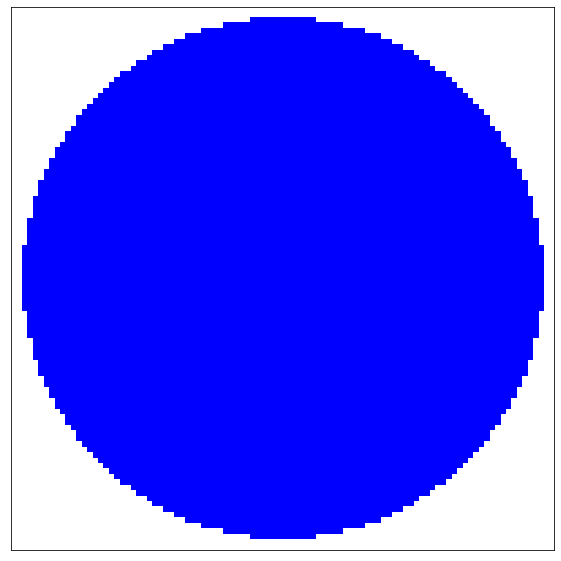

In [42]:
print_matrix(matrix)

In [46]:
# Measure r average

r_average = 0

for i in range(N):
    for j in range(N):
        if matrix[i][j] == 1:
            r_average += r_matrix[i][j]
            
r_average = r_average/N_agents

print("Average r: " + str(r_average))

Average r: 53.107392341882665


In [47]:
def get_r_average_sample_circle(N, density, f1, N_agents = N*N*density*f1):
    
    # Make matrix + r_matrix
    matrix = list()
    r_matrix = list()

    for i in range(N):
        linha = list()
        linha_ = list()
        for j in range(N):
            linha.append(0)
            linha_.append(get_r(i,j,N))
        matrix.append(linha)
        r_matrix.append(linha_)
        
    # Fill matrix
    for agent in range(N_agents): # Iterate on all agents to fill matrix (and make their r the lowest possible)
    
        # Iterate on r_matrix
    
        r_lowest = r_matrix[0][0]
        i_lowest = 0
        j_lowest = 0
    
        for i in range(N):
            for j in range(N):
                if (r_matrix[i][j] < r_lowest) and (matrix[i][j] == 0):
                    r_lowest = r_matrix[i][j]
                    i_lowest = i
                    j_lowest = j
    
        if matrix[i_lowest][j_lowest] == 0:
            matrix[i_lowest][j_lowest] = 1
            
    # Compute r average
    r_average = 0

    for i in range(N):
        for j in range(N):
            if matrix[i][j] == 1:
                r_average += r_matrix[i][j]
            
    return r_average/N_agents

In [60]:
def sample_circles(N, f1s, density, N_agents = -1):
    if N_agents == -1:
        N_agents = [int(N*N*density*f1) for f1 in f1s]
        
    r_aves = list()
    
    for i in range(len(f1s)):
        r_aves.append(get_r_average_sample_circle(N, density, f1s[i], N_agents[i]))
    
    return r_aves

In [61]:
sample_circles(N,np.linspace(0.5,0.6,4),density)

[4500, 4800, 5100, 5400]


[25.231348448834733, 26.05859677602108, 26.860696836721008, 27.639735207308103]